# Zadanie: porównanie metod klasteringu

Do zrobienia:

    Użyj poznanych metod klasteringu, aby podzielić dany zbiór (pamiętaj o skalowaniu itp.).

    Zwizualizuj podział przez każdy algorytm (możesz użyć metod z notatników).

    Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej. Typy czynności (dane zawarte w plikach *labels):
        – marsz
        – wchodzenie w górę po schodach
        – schodzenie w dół ze schodów
        – siedzenie
        – stanie
        – leżenie

    Dobierz prawidłową ilość klastrów w przypadku metody KMeans.

    Na danym zbiorze dokonaj preprocessingu, używając metod klasteringu. Następnie wyszkol dwa wybrane przez siebie klasyfikatory typu Supervised Learning i spróbuj uzyskać jak najlepszy wynik, używając wszystkich znanych sobie "wspomagaczy".


In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA 

from sklearn.metrics import silhouette_score

from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler


In [92]:
# Połączę dane. Do clusteringu nie będę potrzebował podziału na train i test, 
# a podział mogę sobię potem zrobić za pomocą train_test_split. 
# Do tego mogę póżniej chciać skorzystać z walidacji krzyżowej.

In [93]:
# join train and test data
samsung_train = pd.read_csv('samsung_train.txt', delim_whitespace=True, header=None)
samsung_test = pd.read_csv('samsung_test.txt', delim_whitespace=True, header=None)
X = pd.concat([samsung_train, samsung_test], ignore_index=True)
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [94]:
# join train and test labels
samsung_train_labels = pd.read_csv('samsung_train_labels.txt', delim_whitespace=True, header=None)
samsung_test_labels = pd.read_csv('samsung_test_labels.txt', delim_whitespace=True, header=None)
y = pd.concat([samsung_train_labels, samsung_test_labels], ignore_index=True)
y[0]=y[0].map({1: 'marsz', 2: 'wchodzenie w górę po schodach', 3: 'schodzenie w dół ze schodów', 4: 'siedzenie', 5: 'stanie', 6: 'leżenie'})
y.rename(columns ={0:'y'}, inplace = True)
y

,y
0,stanie
1,stanie
2,stanie
3,stanie
4,stanie
...,...
10294,wchodzenie w górę po schodach
10295,wchodzenie w górę po schodach
10296,wchodzenie w górę po schodach
10297,wchodzenie w górę po schodach


In [95]:
df = pd.concat([X, y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,y
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,stanie
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,stanie
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,stanie
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,stanie
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,stanie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,wchodzenie w górę po schodach
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,wchodzenie w górę po schodach
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,wchodzenie w górę po schodach
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,wchodzenie w górę po schodach


Obróbka danych wejściowych:

    Czy potrzeba wszystkich cech?
    Czy potrzebna jest jakaś obróbka?
    Czy wiemy, jak obrobić?
    Czy wiemy, co jaka cecha znaczy?
    Czy potrzebujemy aż dwóch plików?
    Pamiętajmy, że mamy do czynienia z Unsupervised Learning. Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?


In [96]:
# Z racji, że w zadaniu mam pracować tylko na 4 plikach, nie wiem co oznaczają cechy.
# Te cechy są opisane w internecie, ale zgodnie z treścią zadania nie mam do nich dostępu.
# Dane są już obrobione (znormalizowane).
# Podział nie jest potrzebny. Jak już pisałem: połączyłem dane. Do clusteringu nie będę potrzebował podziału na train i test, 
# a podział mogę sobię potem użyć train_test_split. 
# Do tego mogę póżniej chciać skorzystać z walidacji krzyżowej.

## KMeans

In [97]:
# select no. of clusters
kmeans_per_k = [
    KMeans(n_init='auto', n_clusters=k, max_iter=10, random_state=1).fit(X)
    for k in range(2, 10)]

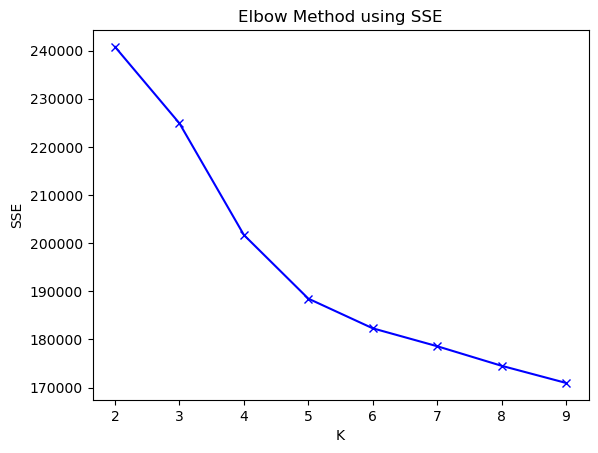

In [98]:
# Elbow method
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 10), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [99]:
# silhouette scores
silhouette_scores = [
    silhouette_score(X, model.labels_)
    for model in kmeans_per_k
]

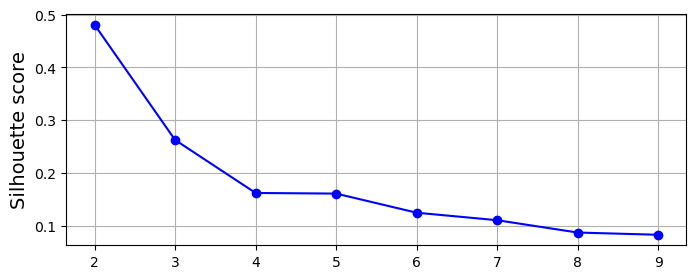

In [100]:
# silhouette scores fig
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

In [101]:
# Zgodnie z metodą najlepiej byłoby wybrać 2 klastry

In [102]:
clf_KMeans = KMeans(n_init='auto', n_clusters=2, max_iter=100, random_state=1)
clf_KMeans.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init='auto', random_state=1)

In [103]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 
pca_data['cluster_KMeans'] = pd.Categorical(clf_KMeans.labels_)

<Axes: xlabel='PC1', ylabel='PC2'>

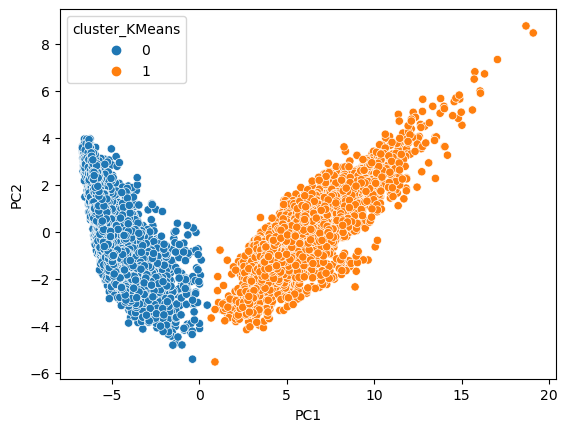

In [104]:
sns.scatterplot(x="PC1",y="PC2",hue="cluster_KMeans",data=pca_data)

In [105]:
y_pred_KMeans=pd.DataFrame(clf_KMeans.predict(X))
y_pred_KMeans.columns=['y_pred_KMeans']
y_pred_KMeans

,y_pred_KMeans
0,0
1,0
2,0
3,0
4,0
...,...
10294,1
10295,1
10296,1
10297,1


In [106]:
df = pd.concat([df, y_pred_KMeans], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,y,y_pred_KMeans
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,stanie,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,stanie,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,stanie,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,stanie,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,stanie,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,wchodzenie w górę po schodach,1
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,wchodzenie w górę po schodach,1
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,wchodzenie w górę po schodach,1
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,wchodzenie w górę po schodach,1


In [107]:
# Compare prediction with true class
comp = df.pivot_table(values=1, index='y_pred_KMeans', columns='y', aggfunc='count', fill_value=0)
comp

y,leżenie,marsz,schodzenie w dół ze schodów,siedzenie,stanie,wchodzenie w górę po schodach
y_pred_KMeans,,,,,,
0,1932,0,0,1774,1906,0
1,12,1722,1406,3,0,1544


Text(0.5, 1.0, 'Actual activities distribution across segments')

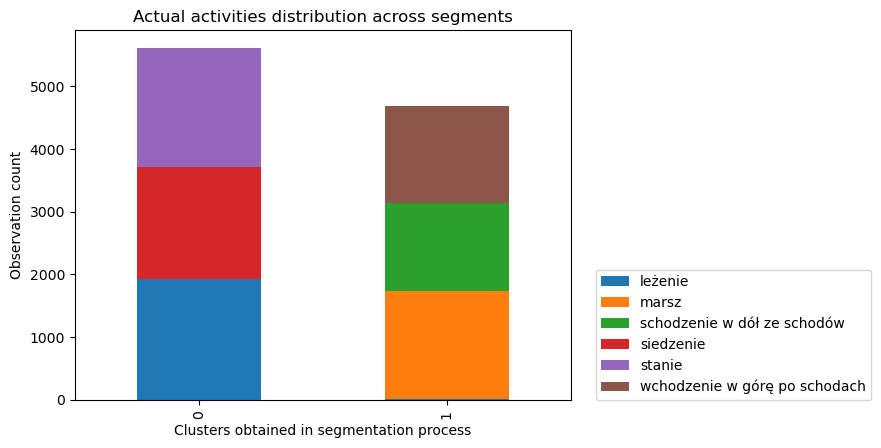

In [108]:
# Compare prediction with true class
comp.plot(kind='bar', stacked=True)
plt.legend(loc=(1.05,0))
plt.ylabel('Observation count')
plt.xlabel('Clusters obtained in segmentation process')

plt.title('Actual activities distribution across segments')

In [109]:
# Podział nie aż taki zły. Tylko, że na dwie grupy klas, a nie 6.

## DBSCAN

<Axes: xlabel='PC1', ylabel='PC2'>

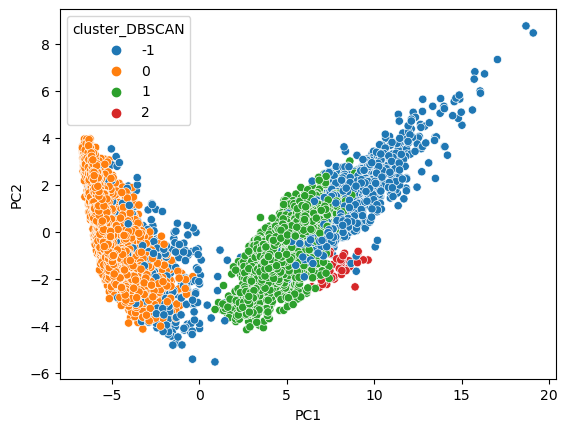

In [110]:
clf_DBSCAN = DBSCAN(eps=4.4, min_samples=30)
y_pred_DBSCAN = pd.DataFrame(clf_DBSCAN.fit_predict(X))
y_pred_DBSCAN.columns=['y_pred_DBSCAN']
pca_data['cluster_DBSCAN'] = pd.Categorical(clf_DBSCAN.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster_DBSCAN",data=pca_data)

In [111]:
df = pd.concat([df, y_pred_DBSCAN], axis=1)
comp = df.pivot_table(values=1, index='y_pred_DBSCAN', columns='y', aggfunc='count', fill_value=0)
comp

y,leżenie,marsz,schodzenie w dół ze schodów,siedzenie,stanie,wchodzenie w górę po schodach
y_pred_DBSCAN,,,,,,
-1,243,176,729,96,63,168
0,1701,0,0,1681,1843,0
1,0,1546,677,0,0,1332
2,0,0,0,0,0,44


Text(0.5, 1.0, 'Actual activities distribution across segments')

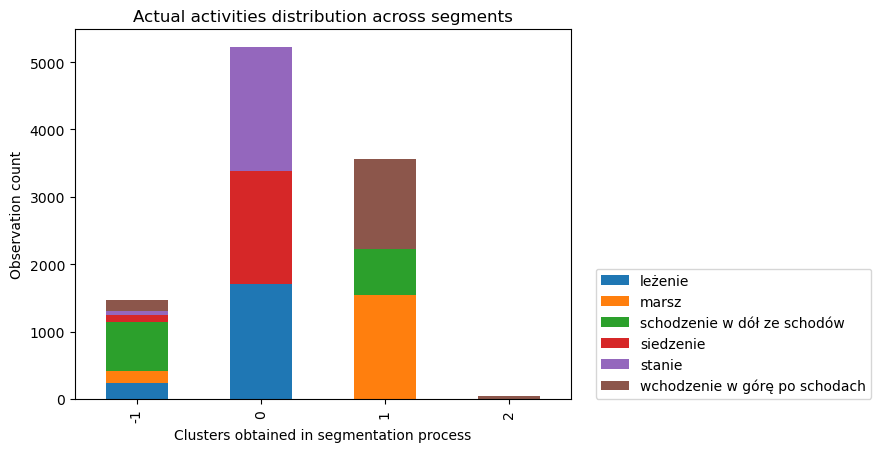

In [112]:
# Compare prediction with true class
comp.plot(kind='bar', stacked=True)
plt.legend(loc=(1.05,0))
plt.ylabel('Observation count')
plt.xlabel('Clusters obtained in segmentation process')

plt.title('Actual activities distribution across segments')

In [113]:
# Nie jakoś super.

## GNN

<Axes: xlabel='PC1', ylabel='PC2'>

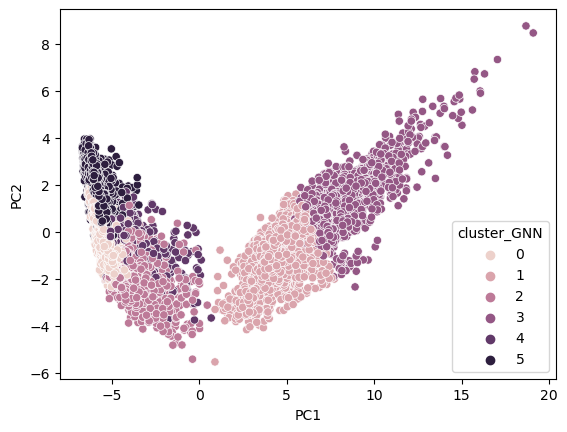

In [118]:
clf_GNN = GaussianMixture(n_components=6, n_init=10, random_state=666)
y_pred_GNN = pd.DataFrame(clf_GNN.fit_predict(X))
y_pred_GNN.columns=['y_pred_GNN']
pca_data['cluster_GNN'] = y_pred_GNN
sns.scatterplot(x="PC1",y="PC2",hue="cluster_GNN",data=pca_data)

In [119]:
df = pd.concat([df, y_pred_GNN], axis=1)
comp = df.pivot_table(values=1, index='y_pred_GNN', columns='y', aggfunc='count', fill_value=0)
comp

y,leżenie,marsz,schodzenie w dół ze schodów,siedzenie,stanie,wchodzenie w górę po schodach
y_pred_GNN,,,,,,
0,0,0,0,1286,1318,0
1,11,1091,378,3,0,1329
2,0,0,0,432,588,0
3,0,631,1028,0,0,215
4,448,0,0,12,0,0
5,1485,0,0,44,0,0


Text(0.5, 1.0, 'Actual activities distribution across segments')

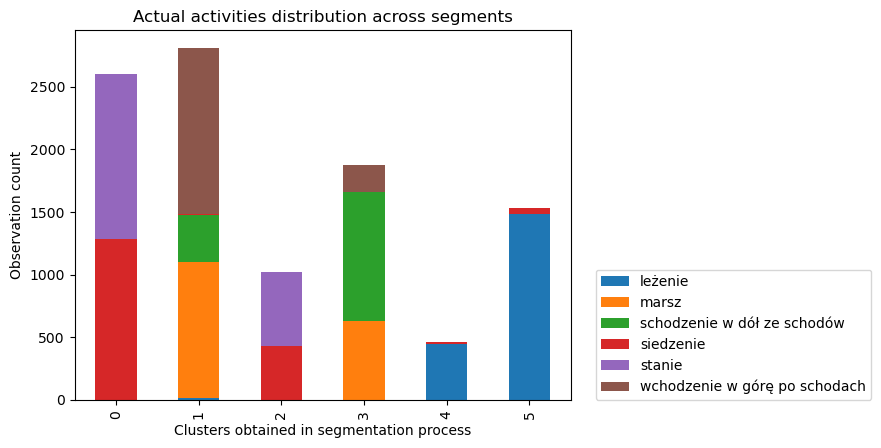

In [120]:
# Compare prediction with true class
comp.plot(kind='bar', stacked=True)
plt.legend(loc=(1.05,0))
plt.ylabel('Observation count')
plt.xlabel('Clusters obtained in segmentation process')

plt.title('Actual activities distribution across segments')

In [121]:
# Też tak sobie.

## Supervised Learning

In [133]:
# Stratification
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2 classifiers
svm_classifier = SVC(kernel='linear')
rf_classifier = RandomForestClassifier(n_estimators=100)

# KMeans clustering
kmeans = KMeans(n_init='auto', n_clusters=6, random_state=1)

# Pipelines with and without KMeans preprocessing
pipelines = [
    ("SVM", svm_classifier),
    ("SVM with KMeans", Pipeline([
        ("Scaler", StandardScaler()),
        ("KMeans", kmeans),
        ("SVM", svm_classifier)
    ])),
    ("Random Forest", rf_classifier),
    ("Random Forest with KMeans", Pipeline([
        ("Scaler", StandardScaler()),
        ("KMeans", kmeans),
        ("Random Forest", rf_classifier)
    ]))
]

# Evaluate each model using cross-validation and compare their performance
results = {}
for name, model in pipelines:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results[name] = scores

# Print the mean accuracy and standard deviation for each model
for name, scores in results.items():
    print(f"{name}:")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")
    print(f"Standard Deviation: {np.std(scores):.4f}")
    print()


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

SVM:
Mean Accuracy: 0.9867
Standard Deviation: 0.0267

SVM with KMeans:
Mean Accuracy: 0.9200
Standard Deviation: 0.0452

Random Forest:
Mean Accuracy: 0.9600
Standard Deviation: 0.0389

Random Forest with KMeans:
Mean Accuracy: 0.9133
Standard Deviation: 0.0686



In [141]:
# KMeans nie pomógł.

## Czym różnią się KMeans, K-fold i K Nearest Neighbors?

KMeans, K-fold i K Nearest Neighbors to trzy różne metody używane w dziedzinie uczenia maszynowego i analizy danych. Oto krótka charakteryzacja każdej z tych metod i ich różnic:

    KMeans:
        - KMeans to algorytm grupowania (clustering), który jest używany do podziału zestawu danych na grupy (klastry) na podstawie podobieństwa między danymi punktami.
        - Algorytm próbuje znaleźć K klastrów, gdzie K jest liczbą określoną przez użytkownika.
        - Podczas działania algorytmu, dane są przypisywane do klastrów na podstawie odległości od środków klastrów.
        - KMeans jest algorytmem nienadzorowanym, co oznacza, że nie wymaga etykiet ani przewodnictwa, aby wykonać grupowanie.

    K-fold cross-validation (K-fold walidacja krzyżowa):
        - K-fold cross-validation to technika oceny wydajności modelu uczenia maszynowego.
        - Zestaw danych jest dzielony na K podzbiorów (zwykle 5 lub 10), zwanych "foldami".
        - Model jest trenowany i testowany K razy. W każdym cyklu jedna z K części jest używana jako zestaw testowy, a pozostałe K-1 części są używane jako zestaw treningowy.
        - Wyniki z K testów są uśredniane lub łączone, aby uzyskać ogólną ocenę wydajności modelu.
        - K-fold cross-validation pomaga uniknąć problemu nadmiernego dopasowania (overfitting) i niedopasowania (underfitting) modelu.

    K Nearest Neighbors (KNN):
        - K Nearest Neighbors to algorytm klasyfikacji lub regresji.
        - W przypadku klasyfikacji, KNN przypisuje punkt do klasy na podstawie większości sąsiadujących punktów treningowych. Oznacza to, że patrzy na K najbliższych punktów treningowych i decyduje na podstawie ich klas.
        - W przypadku regresji, KNN przewiduje wartość numeryczną na podstawie średniej lub mediany wartości K najbliższych sąsiadów.
        - K jest parametrem określającym, ile sąsiadów ma być branych pod uwagę przy podejmowaniu decyzji.
        - KNN jest przykładem algorytmu leniwego (lazy learning), co oznacza, że nie tworzy on modelu, a jedynie przechowuje dane treningowe i dokonuje decyzji w momencie predykcji na podstawie tych danych.

Podsumowując, KMeans to algorytm grupowania danych, K-fold to technika oceny wydajności modelu, a K Nearest Neighbors to algorytm klasyfikacji/regresji oparty na podobieństwie do sąsiadów. Choć mają podobną nazwę związana z literą "K", są to różne metody, które służą różnym celom w analizie danych i uczeniu maszynowym.